In [7]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
import tensorflow as tf

In [2]:
import json
from bs4 import BeautifulSoup
with open('sarcasm.json', 'r') as f:
    datastore = json.load(f)

    for item in datastore:
        sentence = item['headline'].lower()
        label = item['is_sarcastic']
        link = item['article_link']

    f.close()


In [3]:
import json
import string
stopwords = []
table = str.maketrans('', '',string.punctuation)#구두점 삭제
with open('sarcasm.json', mode='r') as f:
    datastore = json.load(f)
sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(',', ' , ')
    sentence = sentence.replace('.', ' . ')
    sentence = sentence.replace('-', ' - ') 
    sentence = sentence.replace('/', ' / ')
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [5]:
len(sentences)

26709

In [6]:
training_size = 23000
training_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [7]:
num_size = 20000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = num_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded =  tf.keras.preprocessing.sequence.pad_sequences(training_sequences, maxlen=10, padding= 'post', truncating= 'post')

In [8]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=10, padding='post', truncating='post')

### 모델 생성 및 학습

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000,16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 re_lu (ReLU)                (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 320,433
Trainable params: 320,433
Non-trainable params: 0
__________________________________________________

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy', optimizer =optimizer, metrics= ['accuracy'])

In [12]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [13]:
history= model.fit(training_padded, training_labels, validation_data=(test_padded, test_labels), epochs = 20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
712/719 [============================>.] - ETA: 0s - loss: 0.6829 - accuracy: 0.5596WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002282C393DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

KeyboardInterrupt: 

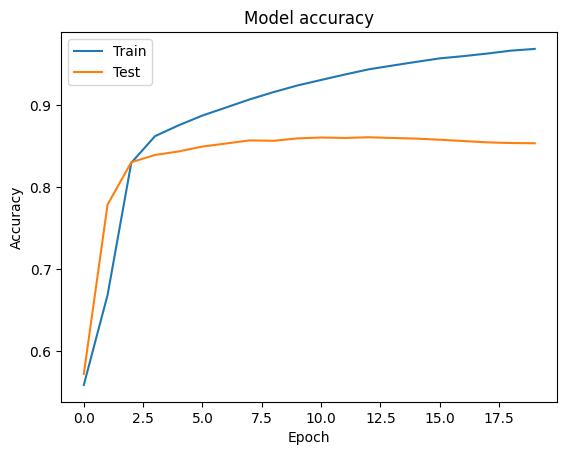

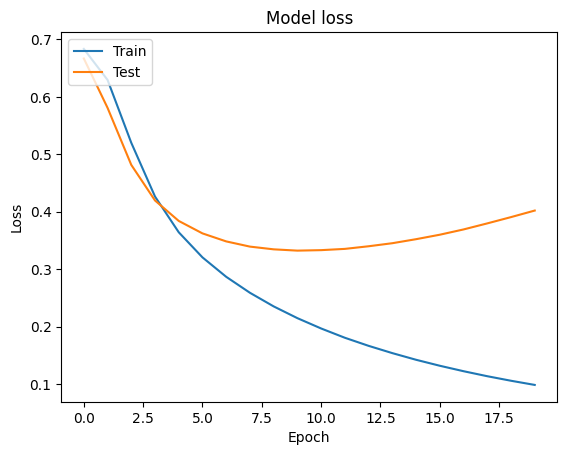

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### LSTM 사용시

In [15]:
import tensorflow as tf

model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 326,401
Trainable params: 326,401
Non-trainable params: 0
_________________________________________________________________


In [18]:
history= model2.fit(training_padded, training_labels, validation_data=(test_padded, test_labels), epochs = 20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
711/719 [============================>.] - ETA: 0s - loss: 0.4117 - accuracy: 0.8010WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002282E46C558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

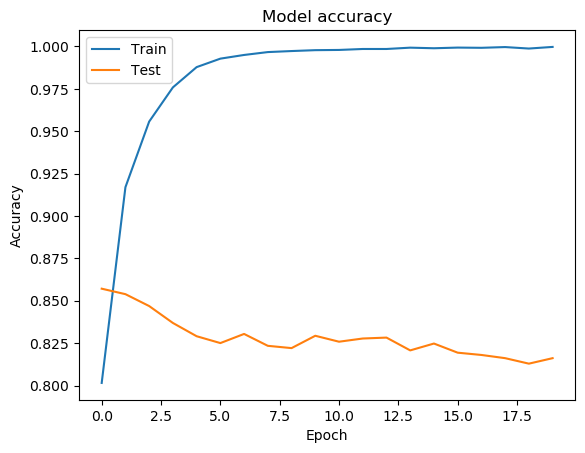

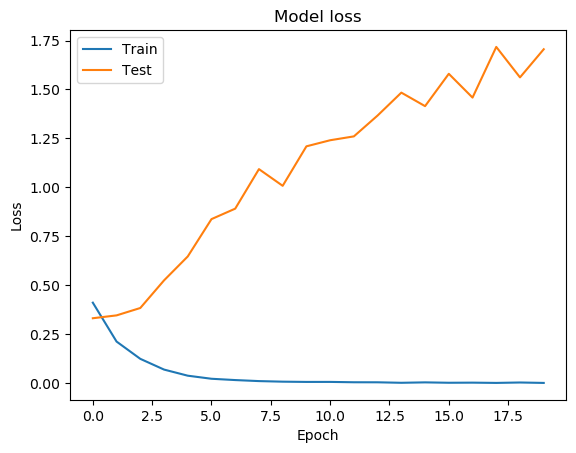

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()